In [1]:
# Importamos las librerías necesarias
import pandas as pd
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preparación de datos para la regresión robusta

In [2]:
# Cargamos los datos
df = pd.read_csv('../Data/felicidad_corrupt.csv')
df.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
# Separamos los datos en X e y
X = df.drop(['country', 'score'], axis=1)
y = df['score']

# Separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Creamos un diccionario con los modelos que vamos a probar
estimadores = {
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
    'RANSAC': RANSACRegressor(), # Meta estimador
    'HUBER': HuberRegressor(epsilon=1.35)
}

# Implementación de la regresión robusta

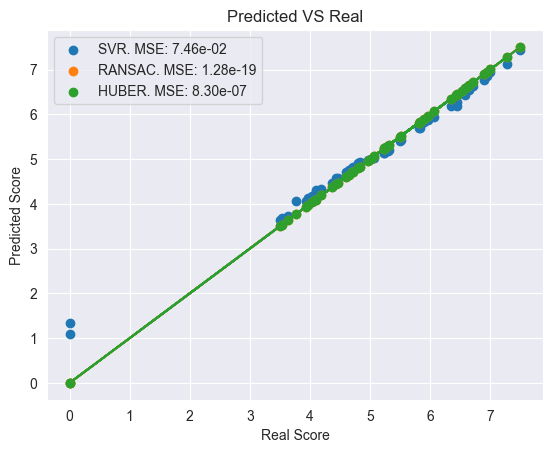

In [25]:
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
# Iteramos sobre los modelos
for name, estimador in estimadores.items():
    # Entrenamos
    estimador.fit(X_train, y_train)
    # Predecimos
    predictions = estimador.predict(X_test)
    # Medimos
    mse = mean_squared_error(y_test, predictions)
    mse = '{:.2e}'.format(mse) # Formateamos el MSE para que sea más legible
    plt.scatter(y_test, predictions, label=f'{name}. MSE: {mse}')
    plt.plot(predictions, predictions, "--")
    plt.legend()
plt.ylabel('Predicted Score')
plt.xlabel('Real Score')
plt.title(f'Predicted VS Real');